# <center>Forecasting income per person</center>
## <center>EDA and Training Model</center>
## Authors:
### >>> Alex Samoylenko
### >>> Vladyslav Honcharuk
### >>> Ostap Kalapun'
### >>> Maksym Chernykh

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and results of your prediction model. Complete this portion of the template after you are done working on your project.

[Back to top](#Index)


## 1. Introduction

The main goal of our project is to create a model for predicting the total revenue per user on the thirtieth day of his life using various machine learning algorithms. Throughout the project, we did 3 main tasks: explored the dataset to get familiar with it, showed some general and statistical data and plotted some graphs, prepared the data by imputing missing values, removed  redundant features and discarded outliers, built a correlation heatmap for identifying properties that are most correlated with the target property. Finally, we tried different algorithms with different number of variables to find the best one in the training set and then used this model to predict user revenue based on the test

[Back to top](#Index)

## 2. The Data

[Back to top](#Index)

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/game-ds/TEST TASK (dataset).csv


In [2]:
# in case of removing errors
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
pd.set_option('display.max_rows', 20)

In [4]:
df = pd.read_csv('../input/game-ds/TEST TASK (dataset).csv')

[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting.



Include a description of the results displayed by each *plot*.

In [5]:
target_variable = "target_full_ltv_day30"
components_target = ['target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30']

In [6]:
df.head()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_135,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467832 entries, 0 to 1467831
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   total_sessions_day0         1466467 non-null  float64
 1   total_sessions_day1         1466465 non-null  float64
 2   total_sessions_day3         1466464 non-null  float64
 3   total_sessions_day7         1466458 non-null  float64
 4   chapters_finished_day0      1467832 non-null  int64  
 5   chapters_finished_day1      1467832 non-null  int64  
 6   chapters_finished_day3      1467832 non-null  int64  
 7   chapters_finished_day7      1467832 non-null  int64  
 8   chapters_opened_day0        1467832 non-null  int64  
 9   chapters_opened_day1        1467832 non-null  int64  
 10  chapters_opened_day3        1467832 non-null  int64  
 11  chapters_opened_day7        1467832 non-null  int64  
 12  chapters_closed_day0        1467832 non-null  int64  
 1

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sessions_day0,1466467.0,1.847298,2.530825,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day1,1466465.0,2.193912,3.621980,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day3,1466464.0,2.608979,5.347342,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day7,1466458.0,3.113484,7.888102,0.000000,1.0,1.0,2.0,905.000000
chapters_finished_day0,1467832.0,1.234763,3.048333,0.000000,0.0,0.0,1.0,73.000000
...,...,...,...,...,...,...,...,...
ad_ltv_day3,1467832.0,0.013254,0.074721,0.000000,0.0,0.0,0.0,19.970615
target_sub_ltv_day30,1467832.0,0.022030,0.308876,-2.829604,0.0,0.0,0.0,45.457412
target_iap_ltv_day30,1467832.0,0.213927,2.097916,0.000000,0.0,0.0,0.0,268.787759
target_ad_ltv_day30,1467832.0,0.020916,0.160193,0.000000,0.0,0.0,0.0,33.930838


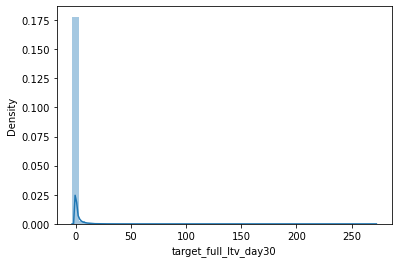

In [9]:
sns_plot = sns.distplot(df[target_variable])

In [10]:
# corr = df.corr()
# cols = corr[target_variable].sort_values(ascending=False)[1:15].index
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# cData_attr = df[cols]
# sns.pairplot(cData_attr, diag_kind='kde')  

TypeError: Horizontal orientation requires numeric `x` variable.

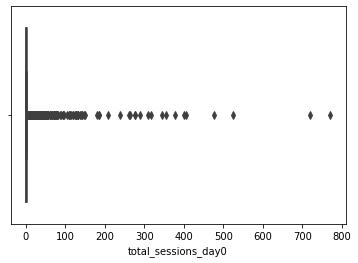

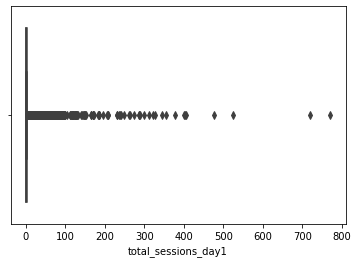

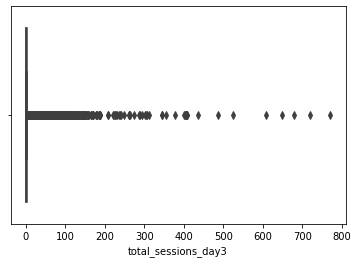

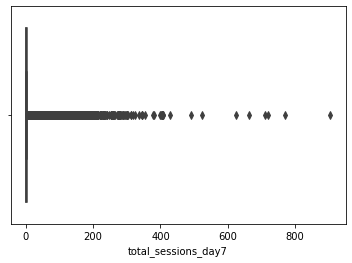

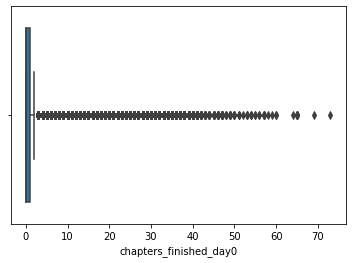

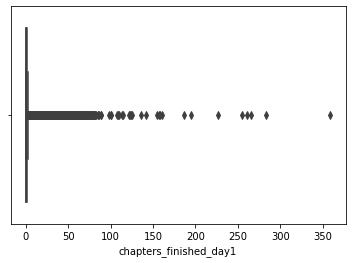

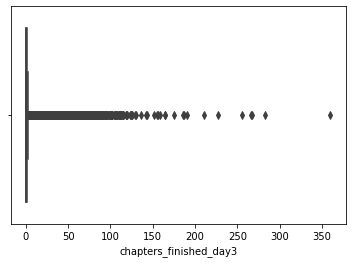

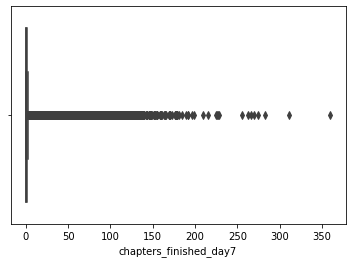

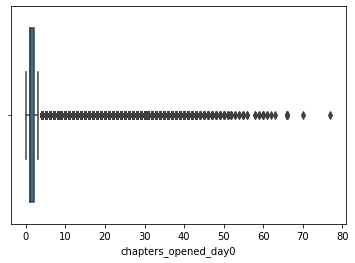

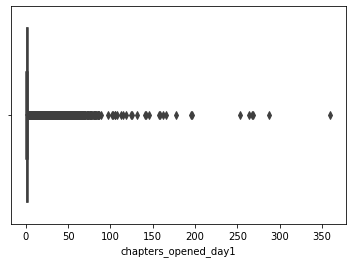

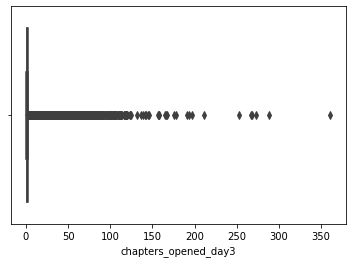

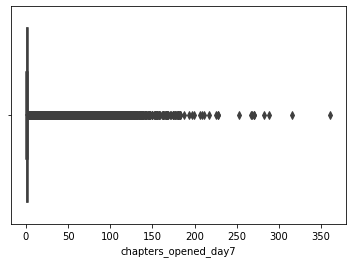

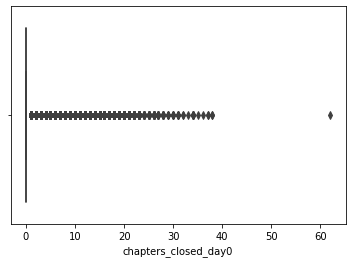

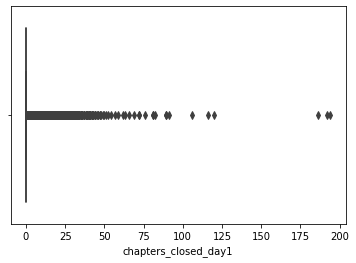

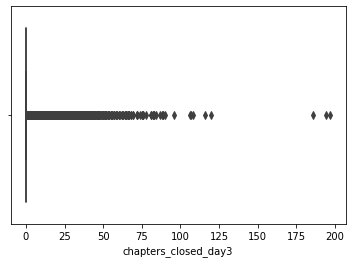

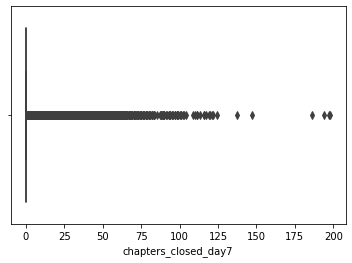

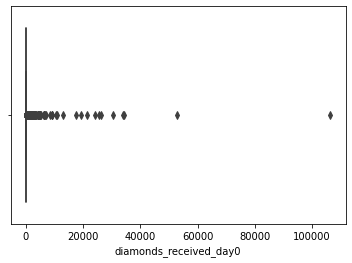

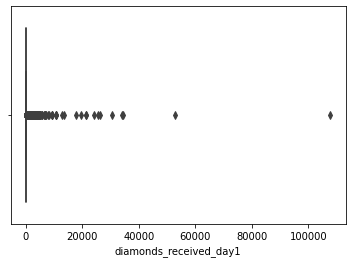

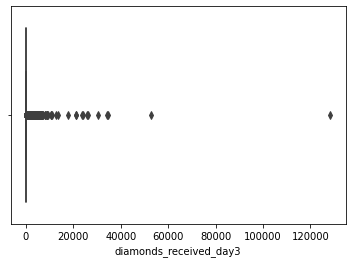

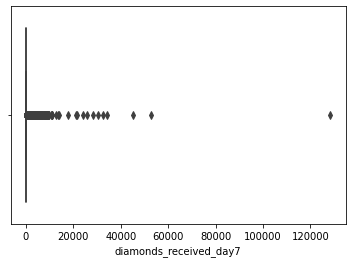

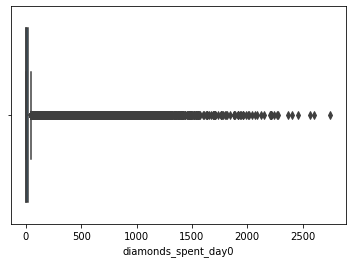

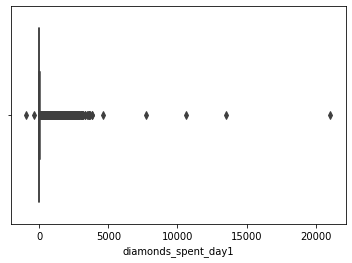

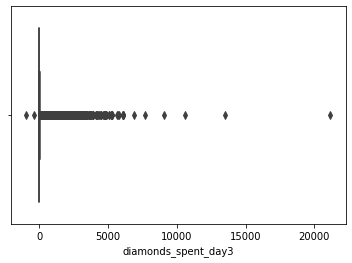

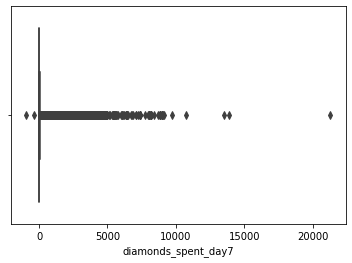

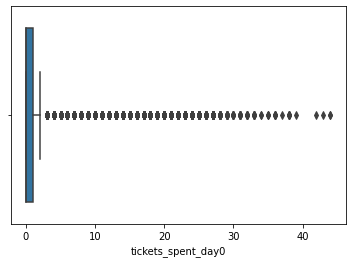

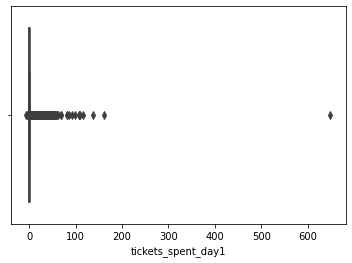

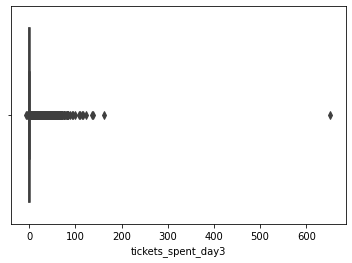

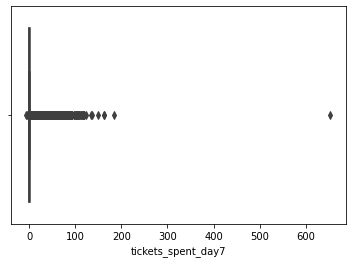

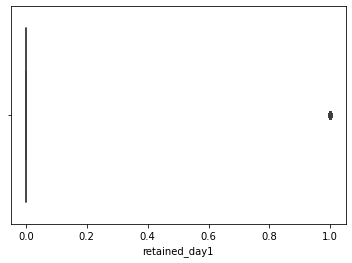

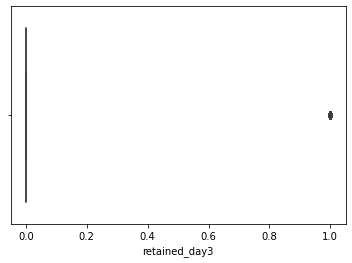

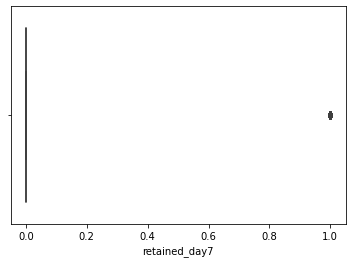

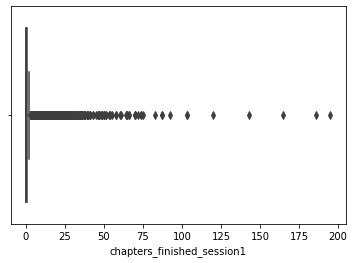

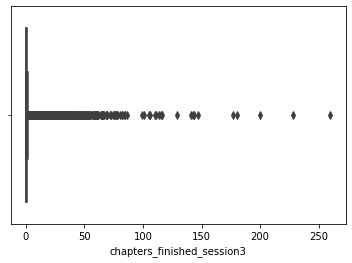

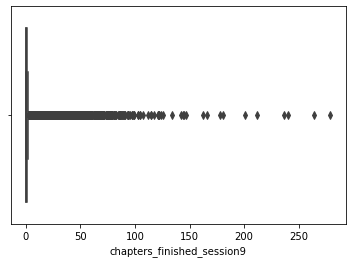

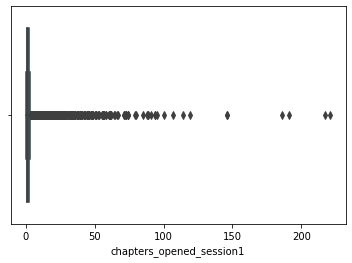

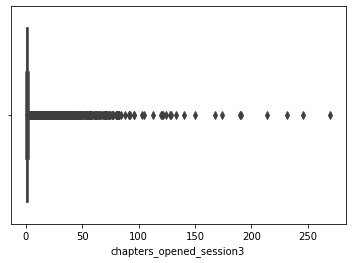

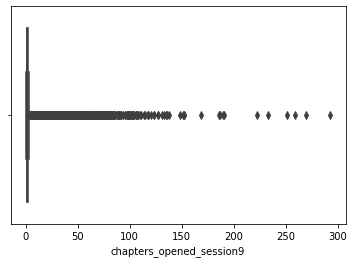

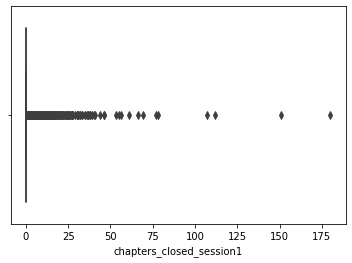

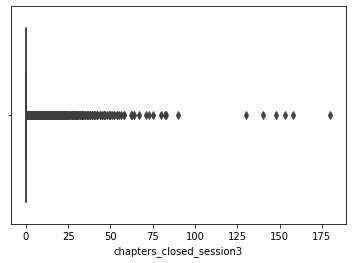

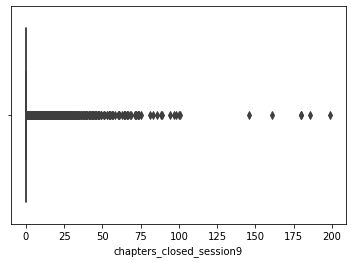

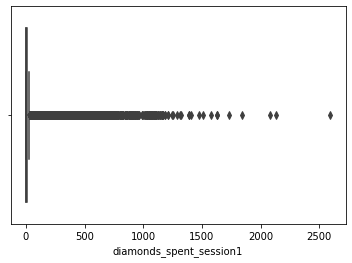

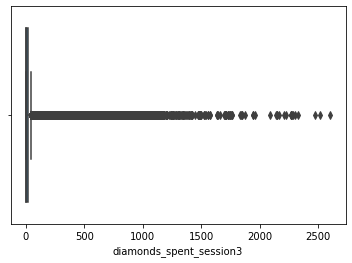

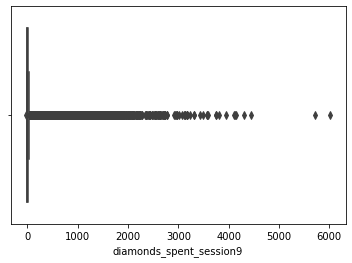

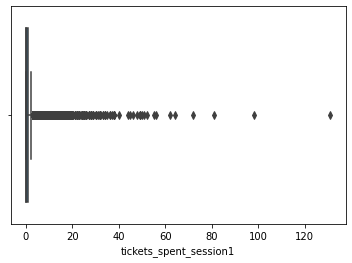

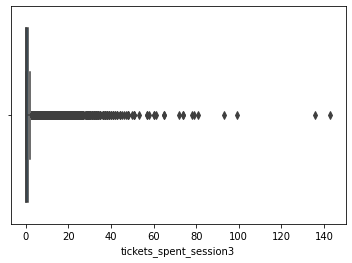

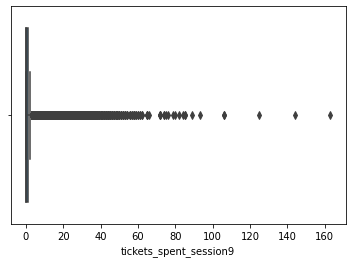

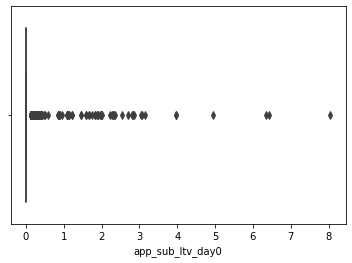

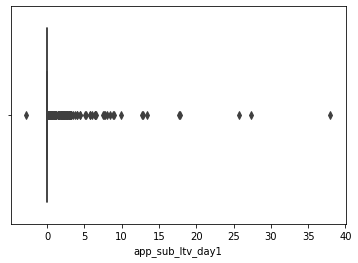

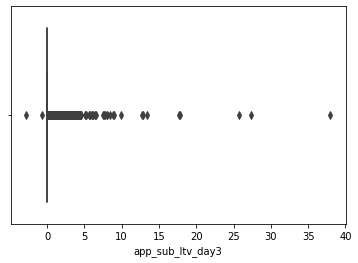

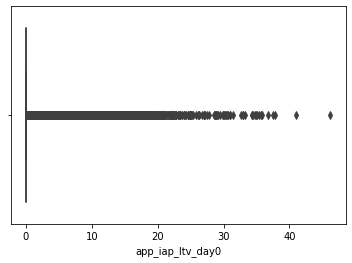

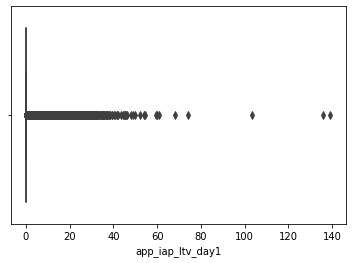

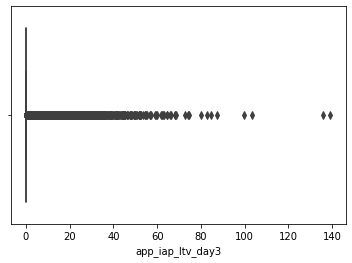

<Figure size 432x288 with 0 Axes>

In [11]:
for element in df.columns:
    plt.figure()
    sns.boxplot(x=df[f"{element}"])

#### Duplicate rows

In [12]:
duplicate_rows = df[df.duplicated()]
print("Number of all rows: ", df.shape[0])
print("Number of duplicate rows : ", duplicate_rows.shape[0])
print("Number of non-duplicate rows: ", df.shape[0] - duplicate_rows.shape[0])

Number of all rows:  1467832
Number of duplicate rows :  840221
Number of non-duplicate rows:  627611


[Back to top](#Index)

### 2.3 Data Preparation

Data preparation is perhaps the most important step in building the ML algorithm. But combination of actions that need to be done to prepare the data almost always stays the same. At first the missing values had to be imputed. Only very small fraction of the data was missing - less than 0.005%, so moda was used to impute this values.

#### Missing values

In [13]:
missing_values = df.isna().sum()[df.isna().sum() > 0]
missing_values

total_sessions_day0    1365
total_sessions_day1    1367
total_sessions_day3    1368
total_sessions_day7    1374
dtype: int64

In [14]:
print(f"Number of missing values: {missing_values.sum()}")

Number of missing values: 5474


In [15]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

#### Categorical data prep

Some variables in the dataset are categorical, which makes the model impotent. They have to be removed or one-hot encoded into dummy variables, the decision was to remove some columns and one-hot encode only one of them - "platform", as it contain only possible values. 3 of other variables, that were removed  are the ones which sum gives the target variable, and the usage of them to predict the target variable is useless. Other are the install date, media source and country code, maybe they can improve the model somehow, but we decided to remove them as they contain a lot of possible values and one-hot encoding is suggested to only use when the number of possible values is not big. 

In [16]:
categorical = df.select_dtypes(include='O').keys()
categorical

Index(['media_source', 'install_date', 'country_code', 'platform'], dtype='object')

In [17]:
platform_cat = pd.get_dummies(df.platform)
df.drop(['platform'], axis=1, inplace=True)
df = pd.concat([df, platform_cat], axis=1)

In [18]:
df_with_add = df.copy()

In [19]:
df.drop(['install_date', 'media_source', 'country_code', 'target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30'], axis=1, inplace=True)

Below are some insights about the platform of users that gives bigger revenue.

IOS users:

In [20]:
df.shape[0] - df[(df["target_full_ltv_day30"] > 0) & (df["android"] == 0)].shape[0]

1279072

Android users:

In [21]:
df.shape[0] - df[(df["target_full_ltv_day30"] > 0) & (df["android"] == 1)].shape[0]

1313300

### Scaling

#### Normalization

The normalization is a good practice to perform when preparing the data, but when it was performed, the size of the dataset was multiplies by 6 and speed of model training hasn't increased significantly, so the decision to not to normalize the data was made.

In [22]:
# from sklearn.preprocessing import StandardScaler

# cols = df.columns
# cols_norm = cols[cols!=('ios' and 'android' and 'target_full_ltv_day30')]
# df[cols_norm] = StandardScaler().fit_transform(df[cols_norm])

### Data Split

Spliting the data is another important process, because the data for training and testing the performance of model has to be different, not always completely, but the test set has to have unseen records. The default split was chosen because we need to have 2 different sheets for testing and training the data, and we cannot use Kfolds or cross-validation to follow this requirement.

In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.7, test_size=0.3)

train.to_csv("train.csv")
test.to_csv("test.csv")

In [24]:
X_train = train.drop('target_full_ltv_day30', axis=1)
y_train = train.target_full_ltv_day30
X_test = test.drop('target_full_ltv_day30', axis=1)
y_test = test.target_full_ltv_day30

[Back to top](#Index)

### 2.4 Correlation

Correlation gives a big insight into making a ML model, because the properties that are not correlated with the target property act like a junk among the usefull staff, they worsen a model. Below are the heatmaps of top 15 most correlated with the target variable and the variables that make the sum of target variable values

Text(0.5, 1.0, 'Pearson Correlation')

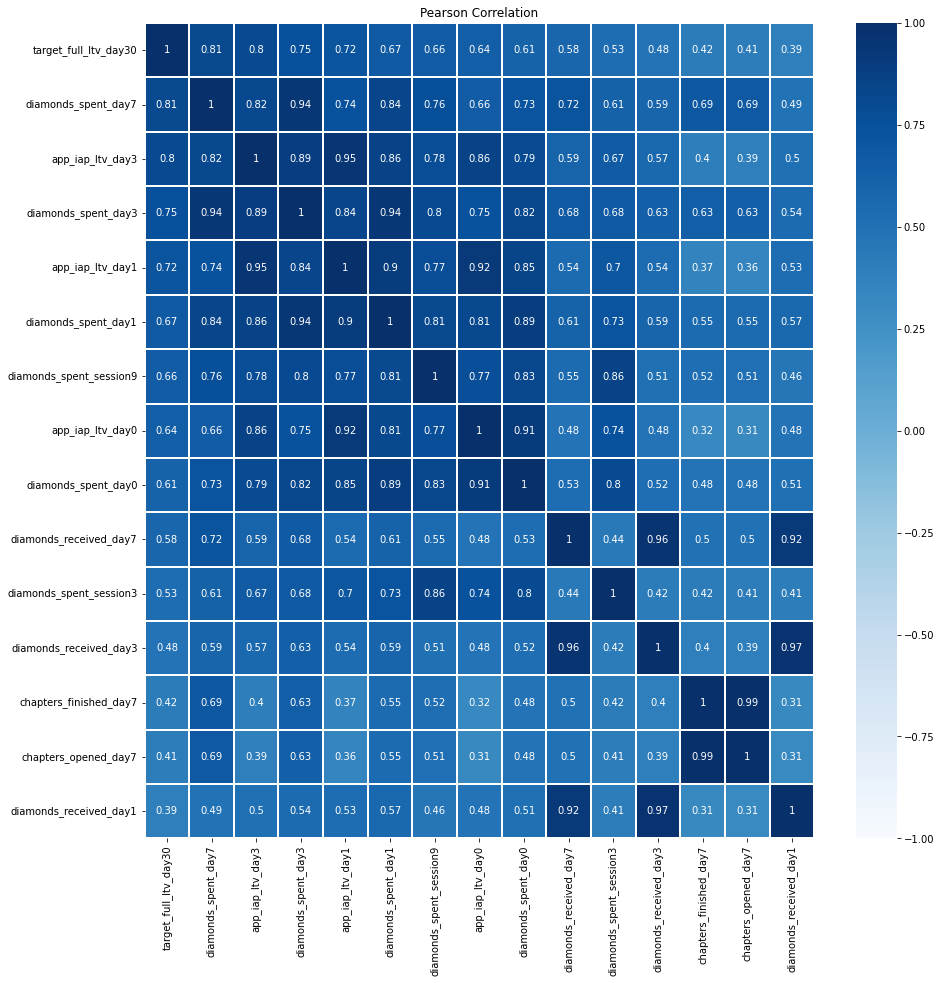

In [25]:
df_comp = df_with_add.drop(components_target, axis=1)
corr = df_comp.corr()
cols = corr[target_variable].sort_values(ascending=False)[0:15].index

pearsonCorr = df_comp[cols].corr(method='pearson')
fig = plt.subplots(figsize=(15, 15))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True,linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Pearson Correlation')

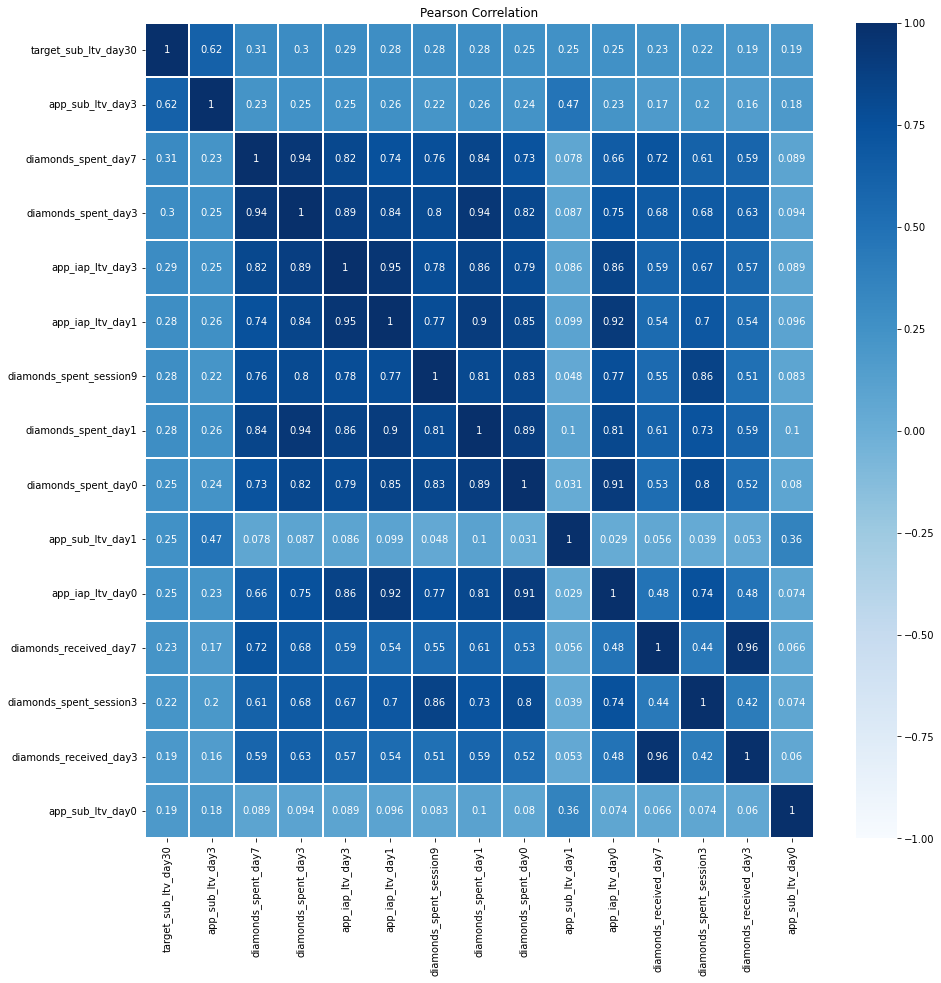

In [26]:
df_comp = df_with_add.drop([*components_target[1:], target_variable] , axis=1)
corr = df_comp.corr()
cols = corr[components_target[0]].sort_values(ascending=False)[0:15].index

pearsonCorr = df_comp[cols].corr(method='pearson')
fig = plt.subplots(figsize=(15, 15))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Pearson Correlation')

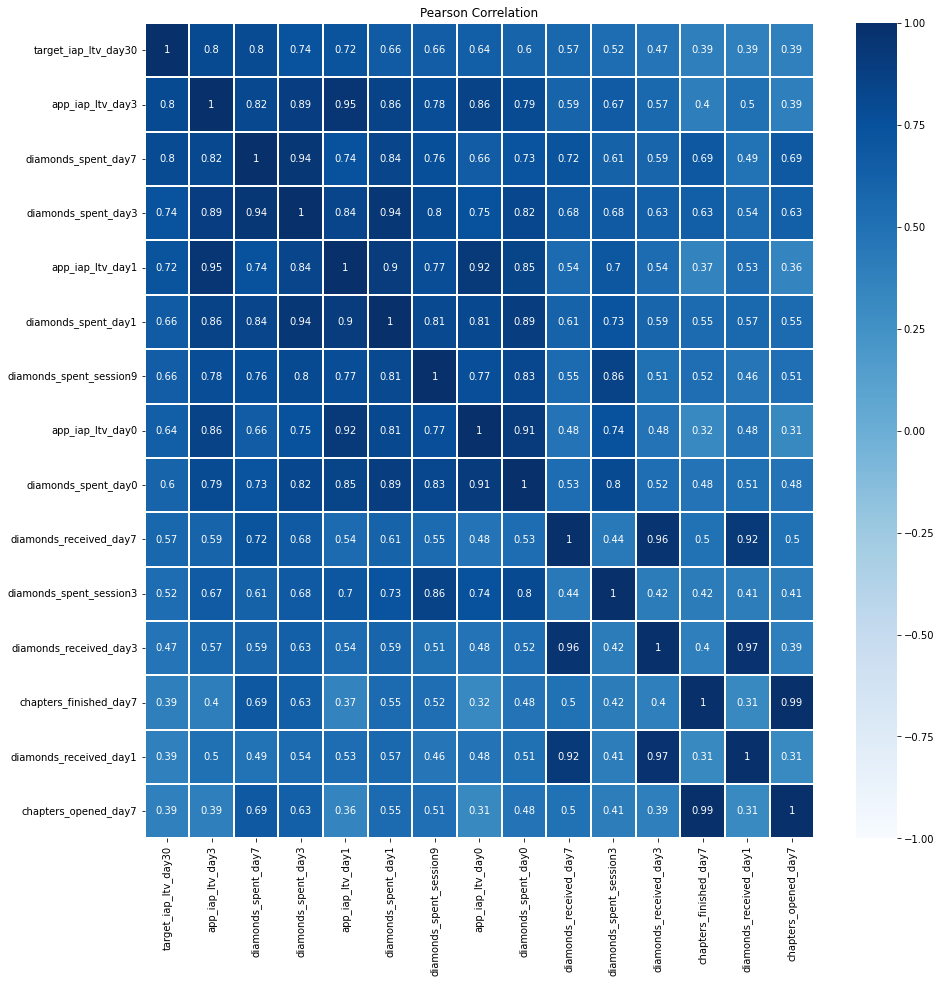

In [27]:
df_comp = df_with_add.drop([components_target[0], components_target[2], target_variable] , axis=1)
corr = df_comp.corr()
cols = corr[components_target[1]].sort_values(ascending=False)[0:15].index

pearsonCorr = df_comp[cols].corr(method='pearson')
fig = plt.subplots(figsize=(15, 15))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Pearson Correlation')

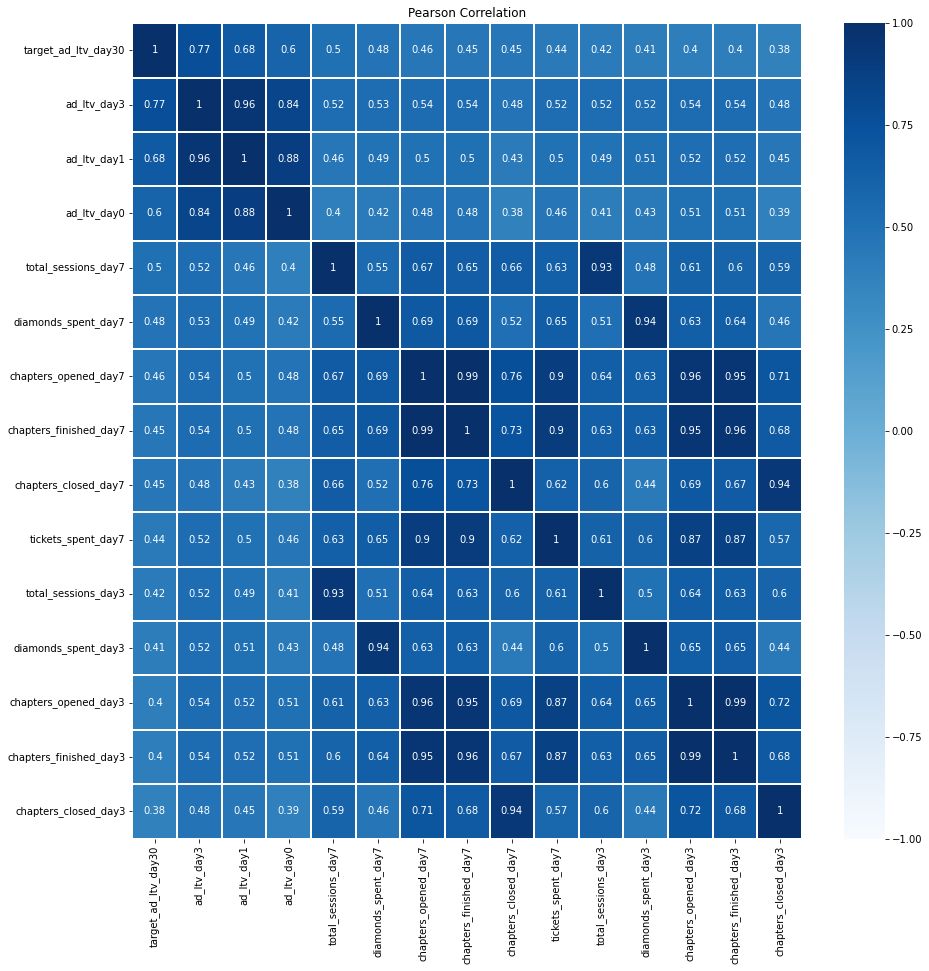

In [28]:
df_comp = df_with_add.drop([components_target[0], components_target[1], target_variable] , axis=1)
corr = df_comp.corr()
cols = corr[components_target[2]].sort_values(ascending=False)[0:15].index

pearsonCorr = df_comp[cols].corr(method='pearson')
fig = plt.subplots(figsize=(15, 15))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

It seems that the first 15 features have pretty high correlation with the target variable and we used that fact to build different models, but we received the scores worse than scores for models that used all or nearly all variables and we decided to leave all variables. Maybe bacause the dataset is big and a lot of target values equals 0 it is better to have all the variables to have more information. We also tried to use the values which sum equals the target variable and build some models and then evaluate the performance of the sum of different models, but we didn't receive a good result.


[Back to top](#Index)

## 3. Project Description

Explain the variables that you analyzed, why you selected them, and what relationships you determined in your analysis.
Make sure you explain specifically what findings you derived from your analysis of the data.


[Back to top](#Index)

### 3.1 Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
1124539/1467831

In [ ]:
model_lgb = LGBMRegressor(n_estimators=2000, learning_rate=0.05)
model_lgb.fit(X_train,
          y_train,
          early_stopping_rounds=10,
          eval_set=[(X_test, y_test)],
          verbose=False)

In [ ]:

predictions = model_lgb.predict(X_test)
score_mae = mean_absolute_error(y_test, predictions)
score_mape = mean_absolute_percentage_error(y_test, predictions)
score_rmse = mean_squared_error(y_test, predictions, squared=False)
score_r2 = r2_score(y_test, predictions)
print("LightGBM")
print("MAE score:", score_mae)
print("MAPE score:", score_mape)
print("RMSE score:", score_rmse)
print("R2 score:", score_r2)

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                   verbose=True, mode='regression')

In [ ]:
exp = explainer.explain_instance(X_test.values[10], model_lgb.predict, num_features=10)
exp.show_in_notebook(show_table=True)

In [ ]:
#model = LinearRegression()
model_xgb = XGBRegressor(n_estimators=500, learning_rate=0.2)
model_xgb.fit(X_train,
          y_train,
          early_stopping_rounds=5,
          eval_set=[(X_test, y_test)],
          verbose=False)

In [ ]:
predictions = model_xgb.predict(X_test)
score_mae = mean_absolute_error(y_test, predictions)
score_mape = mean_absolute_percentage_error(y_test, predictions)
score_rmse = mean_squared_error(y_test, predictions, squared=False)
score_r2 = r2_score(y_test, predictions)
print("XGBoost")
print("MAE score:", score_mae)
print("MAPE score:", score_mape)
print("RMSE score:", score_rmse)
print("R2 score:", score_r2)

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['variable'] = X_train.columns
feature_importance['importance'] = model_xgb.feature_importances_

feature_importance.sort_values(by='importance', ascending=False).head(20)

[Back to top](#Index)

### 3.2 Analysis 


Try to improve the results of your model analysis by including a different number of variables in your code for algorithm. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.





[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?

